In [1]:
from sklearn.datasets import load_boston
import pandas as pd
from sklearn.model_selection import train_test_split



In [20]:
def GenerateDF():
    data=load_boston()
    X,Y=pd.DataFrame(data=data.data, columns=data.feature_names),pd.DataFrame(data=data.target,columns=['Target'])
    return train_test_split(X,Y,test_size=.3)
    
x_train, x_test, y_train,y_test=GenerateDF()

In [30]:
import copy
import numpy as np
def Betas(Xa,Y):
    x=Xa.copy()
    x['intercept']=1
    xt=x.T
    M=xt.dot(x)
    A=pd.DataFrame(np.linalg.pinv(M.values),columns=M.columns)
    return A.dot(xt).dot(Y)
Betas=Betas(x_train,y_train)

In [34]:
def Predict(X,betas):
    x=X.copy()
    x['intercept']=1
    return x.dot(np.array(betas))
y_train_pred=Predict(x_train,Betas)

In [37]:
y_test_pred=Predict(x_test,Betas)

In [39]:
from sklearn.metrics import r2_score, mean_squared_error
import math

print('rmse train',math.sqrt(mean_squared_error(y_train,y_train_pred)))
print('rmse test',math.sqrt(mean_squared_error(y_test,y_test_pred)))

rmse train 4.388725286008921
rmse test 5.650215274139472


In [41]:
print('r2 score train',r2_score(y_train,y_train_pred))
print('r2 score test',r2_score(y_test,y_test_pred))

r2 score train 0.7732210292768256
r2 score test 0.6145546667233176


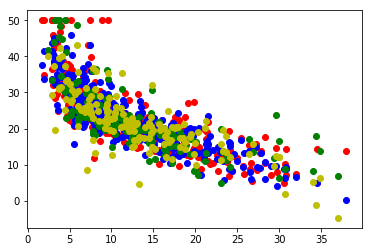

In [43]:
import matplotlib.pyplot as plt
plt.figure
plt.plot(x_train[['LSTAT']],y_train,'ro')
plt.plot(x_train[['LSTAT']],y_train_pred,'bo')
plt.plot(x_test[['LSTAT']],y_test,'go')
plt.plot(x_test[['LSTAT']],y_test_pred,'yo')
plt.show()